In [ ]:
library(Seurat)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(pheatmap)
library(presto)
library(MetBrewer)
library(RColorBrewer)

In [ ]:
# Read in data
seurat <- readRDS('iGlut_pre_seurat.rds')
muo <- readRDS('prepat_multiome_seurat.rds')

# Read in samples of interest
muo_good_sample <- readRDS('muo_good_sample.rds')
muo_good_sample <- paste0('p3_', muo_good_sample)


In [4]:
# Genedate df for region proportion in seurat and muo
df_muo <- as.data.frame(prop.table(table(muo$parse_id_transfer, muo$annotation), margin=1))
df_seurat <- as.data.frame(prop.table(table(seurat$parse_id, seurat$region), margin=1))


Loading required package: Pando



In [ ]:
# From muo combine annotations:
# From all forebrain relevant progenitors into forebrain
# From hindbrain and spinal cord into hindbrain_spinal_cord
# From mesoderm and ncc to other

old_annotation <- unique(muo$annotation)
print(old_annotation)

new_annotation <- c('Hindbrain_spinal_cord', 'Other', 'Forebrain',
                    'Forebrain', 'Retina', 'ND', 'Forebrain',
                    'Hindbrain_spinal_cord', 'Midbrain', 'Other', 'iPSC'
                   )

muo$annotation_cb <- plyr::mapvalues(
    muo@meta.data$annotation,
    from = old_annotation,
    to = new_annotation
)


# To be able to match annotations between dataset
# From seurat combine annotations:
# From optic cup into retina
# From hindbrain and spinal cord into hindbrain_spinal_cord

old_region <- unique(seurat$region)
print(old_region)

new_region <- c('Other', 'Hindbrain_spinal_cord', 'Forebrain',
                'SYM', 'Midbrain', 'Retina', 'Hindbrain_spinal_cord'
               )

seurat$region_cb <- plyr::mapvalues(
    seurat@meta.data$region,
    from = old_region,
    to = new_region
)


 [1] "Spinal cord progenitor"       "Mesodermal progenitor"       
 [3] "Forebrain progenitor"         "Dorsal forebrain progenitor" 
 [5] "Retina progenitor"            "ND"                          
 [7] "Ventral forebrain progenitor" "Hindbrain progenitor"        
 [9] "Midbrain progenitor"          "NCC progenitor"              
[11] "iPSC"                        
[1] "Other"       "Hindbrain"   "Forebrain"   "SYM"         "Midbrain"   
[6] "Optic cup"   "Spinal cord"


In [ ]:
# Genedate df for combined region proportion in muo
df_muo_cb <- as.data.frame(prop.table(table(muo$parse_id_transfer, muo$annotation_cb), margin=1))
df_seurat_cb <- as.data.frame(prop.table(table(seurat$parse_id, seurat$region_cb), margin=1))

# Setting names for the dataframe
names(df_muo_cb) <- c('sample', 'annotation', 'muo_freq')
names(df_seurat_cb) <- c('sample', 'annotation', 'seurat_freq')

In [ ]:
# Calculate and plot out correlation between regions in muo and seurat
mtx_muo <- prop.table(table(muo$parse_id_transfer, muo$annotation_cb), margin=1)
mtx_seurat <- prop.table(table(seurat$parse_id, seurat$region_cb), margin=1)

cor_fate_sample <- cor(t(mtx_muo[muo_good_sample, fate]), t(mtx_seurat[muo_good_sample, fate]), method="spearman")

# Extract the diagonal of fate correlation in each sample
cor_fate <- as.data.frame(diag(cor_fate_sample)) %>% 
    arrange(desc(diag(cor_fate_sample)))

names(cor_fate) <- c('fate_cor')

cor_fate <- cor_fate %>%
    mutate(sample = rownames(cor_fate))

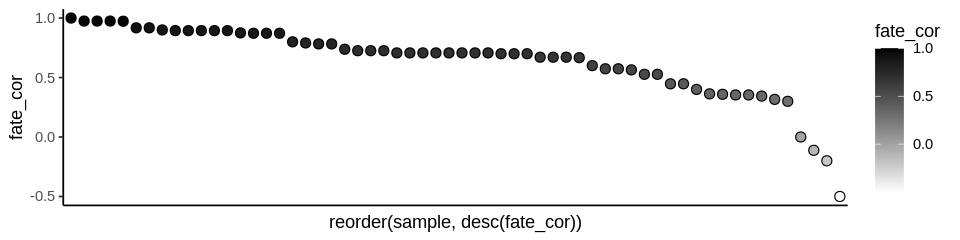

In [ ]:
options(repr.plot.width=8, repr.plot.height=2)
ggplot(cor_fate, aes(x=reorder(sample, desc(fate_cor)), y=fate_cor)) + 
    geom_point(aes(fill=fate_cor), shape = 21, size=2.5) +
    scale_fill_gradient(low="white", high="black") +
    theme_classic() +
    theme(axis.text.x=element_blank(),
          axis.ticks.x=element_blank())

ggsave('fate_corr.pdf', 
       width=16, height=5, unit='cm')
